# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings



In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#data cleaning
import ast
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
def into_list(skills):
  if(pd.isna(skills)):
    return []
  else:
    return ast.literal_eval(skills)
df['job_skills']=df['job_skills'].apply(into_list)

In [3]:
df_US=df[df['job_country']=='United States']
df_skills=df_US.explode('job_skills')
df_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_count=df_count.reset_index(name='skill_count')
df_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [4]:
job_titles=df_count['job_title_short'].unique().tolist()
job_titles=sorted((job_titles[:3]))


In [6]:
df_job_count=df_US['job_title_short'].value_counts().reset_index(name='job_count')
df_skill_perc=pd.merge(df_job_count,df_count,on='job_title_short',how='left')
df_skill_perc['skill_perc']=df_skill_perc['skill_count']/df_skill_perc['job_count']*100
df_skill_perc['skill_perc']=df_skill_perc['skill_perc'].round(0).astype(int)
df_skill_perc.sort_values(by='skill_perc',ascending=False,inplace=True)


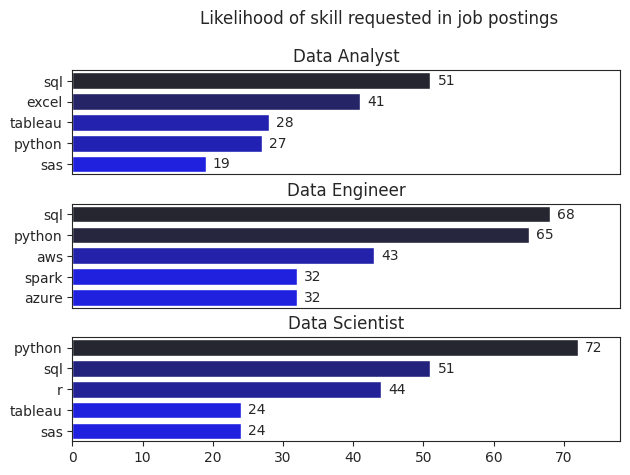

In [7]:


fig, ax = plt.subplots(len(job_titles), 1)
fig.suptitle('Likelihood of skill requested in job postings', x=0.6)
sns.set_style('ticks')

for i, title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == title].head(5)
    sns.barplot(y='job_skills', x='skill_perc', data=df_plot, ax=ax[i], hue='skill_perc',palette='dark:b_r', legend=False)
    ax[i].set_title(title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 78)

    for j, y in enumerate(df_plot['skill_perc']):
        ax[i].text(y + 1, j, y, va='center')

    if i < len(job_titles) - 1:
        ax[i].set_xticks([])

fig.tight_layout(h_pad=0.5)
plt.show()
